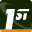  <font style="font-size:34px">&nbsp; <b>FIRST.org</b></font>

© 2023, Serge Droz, FIRST.org

<h1>Introduction</h1>
A lot of incident response work is about analyzing and enriching data. Some of this will be done on a daily basis, others is incident specific.

Jupyter notebooks are a powerful tool helping incident responders to to develop new analysis methods, investigate data and annotate the work. Jupyter notebooks can be shared, or even worked on collaboratively if run on a Jupyter Hub. 

This notebook gives an introduction to Jupyter as well as to some tools useful in incident response.
It assumes you do have a basic understanding of python. There are many [tutorials](https://wiki.python.org/moin/BeginnersGuidehttps://wiki.python.org/moin/BeginnersGuide) available online.

## Initialization 

Please run the cell below by **putting the mouse into the cell** and then **pressing *shift enter***. It will initialize things. If this runs in jupyterlite it may take a while.

In [12]:
import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
#cm = sns.color_palette("Paired", 10)
#plt.rcParams.update({'font.size': 22})

# Display plots inline
%matplotlib inline

svg_first  = '<svg viewBox="0 0 101 101"><g transform="translate(-30 -107)"><path d="m30 108h101v101h-101z" fill="#142700"/><g fill="#fff"><g fill-rule="evenodd"><path d="m83 144c.2 3 2 5 4 7 .9.8 2 2 2 3 .04 2-2 3-3 3-2-.1-4-2-5-4-.5 3-1 7-2 10 4 2 8 2 12 .03 5-2 7-8 7-13-.3-2-2-4-4-6-4-.001-7-.002-11-.003z" stroke-width=".09"/><polygon class="cls-5" transform="matrix(.09 0 0 .09 32 103)" points="859 425 768 425 735 631 827 631"/><path class="cls-5" d="m94 131c-5 0-9 3-10 6h35l1-6z" stroke-width=".09"/></g><path class="cls-6" d="m48 197 8-54h-5l2-13h24l-10 66z" stroke-width=".09"/></g><path d="m30 184h101v24h-101z" fill="#ff8000"/></g></svg>'
jl_first_svg = '<g transform="scale(0.2 0.2) translate(-30 -107)"><path d="m30 108h101v101h-101z" fill="#142700"/><g fill="#fff"><g fill-rule="evenodd"><path d="m83 144c.2 3 2 5 4 7 .9.8 2 2 2 3 .04 2-2 3-3 3-2-.1-4-2-5-4-.5 3-1 7-2 10 4 2 8 2 12 .03 5-2 7-8 7-13-.3-2-2-4-4-6-4-.001-7-.002-11-.003z" stroke-width=".09"/><polygon class="cls-5" transform="matrix(.09 0 0 .09 32 103)" points="859 425 768 425 735 631 827 631"/><path class="cls-5" d="m94 131c-5 0-9 3-10 6h35l1-6z" stroke-width=".09"/></g><path class="cls-6" d="m48 197 8-54h-5l2-13h24l-10 66z" stroke-width=".09"/></g><path d="m30 184h101v24h-101z" fill="#ff8000"/></g>'

def set_jl_fav_icon( s ):
    # Set the tab's icon in a iupyterlite setting to an SVG image or character
    from IPython.display import display_javascript
    
    if len(s) == 1:
        ih = '<text y=".9em" font-size="15">{}</text>'.format(s)
    else:
        ih = s
        
    script = """var ih = '{}';
    
    var y = document.getElementsByClassName("lm-TabBar-tabIcon p-TabBar-tabIcon fix2bjg")
    var x='';
    for (var i = 0; i < y.length; i++) {{
            x = y[i].children[0].children[0]
            x.innerHTML = ih
    }}""".format(ih)
    
    display_javascript(script, raw=True)
    
def set_fav_icon( s ):
    """Set the tab favicon to an emoji or a svg file"""
    from IPython.display import display_javascript
    import re
    
    if len(s) == 1:
        vb = '0 0 220 220'
        ih = '<text y=".9em" font-size="200">{}</text>'.format(s)
    else:
        vb = re.findall(r'viewBox\s*=[\s\'\"]+([\-\d\.\s]+)[\s\'\"]+', s )[0]
        ih = re.findall(r'<svg[^<]+(<.+)</svg>', s )[0]
    script = """
      var id = document.activeElement.parentElement['id']
      var y = document.querySelectorAll('[data-id=' + id + ']')
      var x
      for (var i = 0; i < y.length; i++) {{
        x = y[i].children[0].children[0]
        x.setAttribute('viewBox','{}')
        x.innerHTML = '{}'
      }}
    """.format(vb,ih)

    display_javascript(script, raw=True)

# Some intitialisation
# If we run in jupyterlit we need to install dnspython. Since jupyterlite does not support sockets the fuctionality will be reduced. 
try:
    import piplite
    await piplite.install('dnspython')
    set_jl_fav_icon( jl_first_svg  )
except:
    set_fav_icon( svg_first )

In [10]:
# This is for Colab
try:
    from google.colab import drive
    drive.mount('/gdrive')
    %cd /gdrive
    fpath = '/gdrive/My Drive/Tutorial/'
except:
    fpath = 'data'

In [8]:
%ls

files/           Lesson_01.ipynb  sample-log-01.txt
first.svg        Lesson_02.ipynb  Tutorial.ipynb
geckodriver.log  _output/         webserver-log-01.txt


## Importing data

Data can be read from API's or a variety of file formats, like csv. For this training we supply the data in files. 
In the next cell we read the logs from an IDS, bro to be specific. The data is saved as a cvs, which pandas can read directly. 

To see all the options of `pd.read_csv` put the cursor inside the arguments area and hit `Shift - Tab`. 

In [19]:
df = pd.read_csv( os.path.join( fpath, 'nids.csv' ), quotechar="'" )
df 

,eventId,timestamp,srcIp,srcName,dstIp,dstName,srcPort,dstPort,sigName,sigId,status_type,status_value,Unnamed: 12
0,6578365050481851,1.558129e+09,172.20.96.4,NaN,10.46.13.34,NaN,37926,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,0,0,NaN
1,6578365050481855,1.558129e+09,172.20.96.4,NaN,10.46.13.34,NaN,37926,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,0,0,NaN
2,6567504096608174,1.557403e+09,192.168.153.245,NaN,10.46.13.48,NaN,51998,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN
3,6567504096608176,1.557403e+09,192.168.153.245,NaN,10.46.13.48,NaN,51998,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
4,6567504096608147,1.557403e+09,192.168.153.245,NaN,10.46.13.33,NaN,63528,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,6567504096536397,1.557209e+09,10.46.13.27,NaN,10.24.114.15,NaN,445,59980,ET EXPLOIT ETERNALBLUE Probe Vulnerable System...,1:2025650,4,4,NaN
966,6567504096536387,1.557209e+09,10.24.114.15,NaN,10.46.13.16,NaN,57189,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN
967,6567504096536388,1.557209e+09,10.24.114.15,NaN,10.46.13.16,NaN,57189,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
968,6567504096536353,1.557209e+09,10.24.114.15,NaN,10.46.13.5,NaN,52673,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN


## Cleaning the data

As you can see, the timestamp is not very readable, it's seconds since epoch. It often so happens, that the data first must be cleaned to be useful. Pandas contains a powerful conversion function to do this.

Quite often much more clean up is needed. 

In [20]:
df['timestamp'] = pd.to_datetime( df['timestamp'],  unit='s', )
df 

,eventId,timestamp,srcIp,srcName,dstIp,dstName,srcPort,dstPort,sigName,sigId,status_type,status_value,Unnamed: 12
0,6578365050481851,2019-05-17 21:43:42.755000064,172.20.96.4,NaN,10.46.13.34,NaN,37926,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,0,0,NaN
1,6578365050481855,2019-05-17 21:43:42.755000064,172.20.96.4,NaN,10.46.13.34,NaN,37926,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,0,0,NaN
2,6567504096608174,2019-05-09 12:03:00.721999872,192.168.153.245,NaN,10.46.13.48,NaN,51998,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN
3,6567504096608176,2019-05-09 12:03:00.721999872,192.168.153.245,NaN,10.46.13.48,NaN,51998,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
4,6567504096608147,2019-05-09 12:02:18.672000000,192.168.153.245,NaN,10.46.13.33,NaN,63528,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,6567504096536397,2019-05-07 06:05:26.930000128,10.46.13.27,NaN,10.24.114.15,NaN,445,59980,ET EXPLOIT ETERNALBLUE Probe Vulnerable System...,1:2025650,4,4,NaN
966,6567504096536387,2019-05-07 06:05:03.049999872,10.24.114.15,NaN,10.46.13.16,NaN,57189,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN
967,6567504096536388,2019-05-07 06:05:03.049999872,10.24.114.15,NaN,10.46.13.16,NaN,57189,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025992,4,4,NaN
968,6567504096536353,2019-05-07 06:04:23.857000192,10.24.114.15,NaN,10.46.13.5,NaN,52673,445,ET EXPLOIT Possible ETERNALBLUE Probe MS17-010...,1:2025649,4,4,NaN


## Visualize

Lists are not very interesting. Let us visualize data. Pandas has build in plotplt.get_cmap('hot')ting facilities, which makes it very easy to get a quick idea of what we are dealing with. It's good practice to add titles, and axis labels. 

In [21]:
df['sigName'].value_counts()

ET EXPLOIT Possible ETERNALBLUE Probe MS17-010 (MSF style)          363
ET EXPLOIT Possible ETERNALBLUE Probe MS17-010 (Generic Flags)      363
ET EXPLOIT Possible DOUBLEPULSAR Beacon Response                    167
ET EXPLOIT Possible ETERNALBLUE MS17-010 Echo Response               36
ET EXPLOIT ETERNALBLUE Exploit M2 MS17-010                           19
ET EXPLOIT ETERNALBLUE Probe Vulnerable System Response MS17-010     13
ET EXPLOIT Possible ETERNALBLUE MS17-010 Heap Spray                   9
Name: sigName, dtype: int64

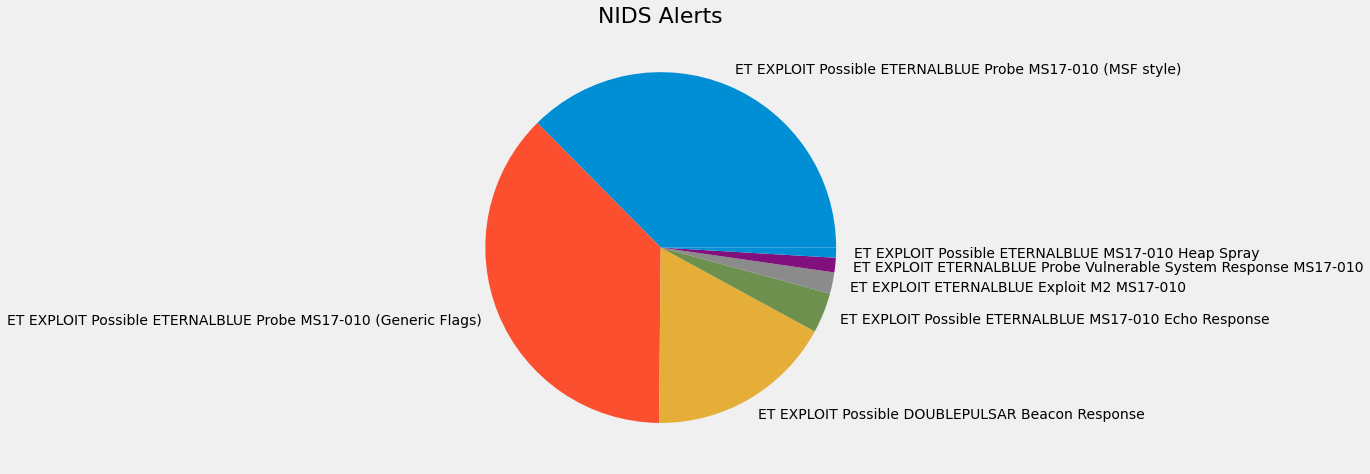

In [43]:
plt.style.use('fivethirtyeight')
ax = df['sigName'].value_counts().plot(kind='pie', figsize=(7,10))
ax.set_title("NIDS Alerts", size=22)
_ = ax.set_ylabel("")

## Excercise

Which source ip was most common?

# Elaborate ploting

Pandas has powerful ploting capabilities. But it is not suitable for complex plots. There are a couple of ploting frameworks, but the most commonly used is matplotlib. It is not always easy to use, but it is very powerful.  

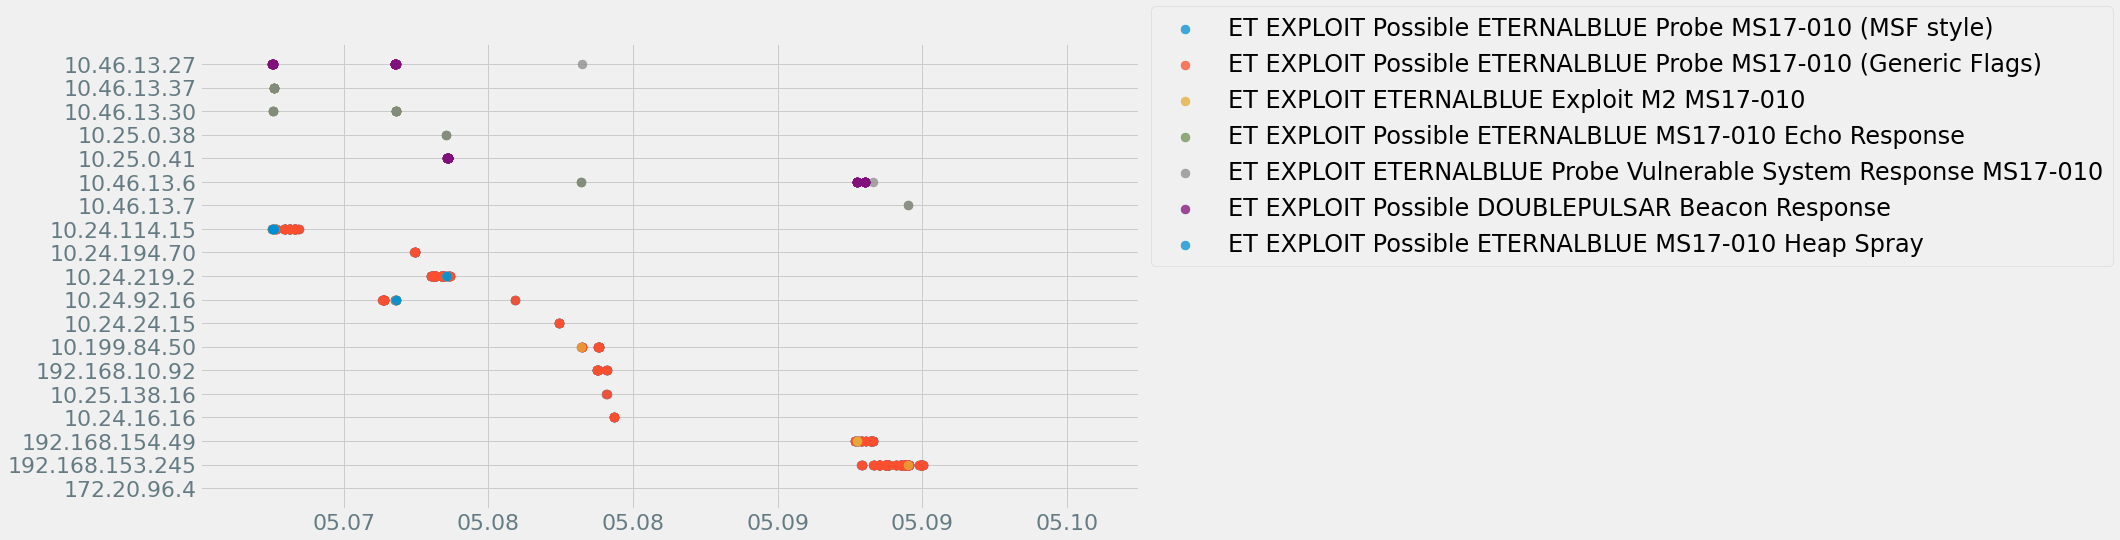

In [60]:
def plot_timeline( df ):
        
    end = df['timestamp'].max() + datetime.timedelta(hours=6)
    end = datetime.datetime(2019,5,10,6,0,0)
    start = df['timestamp'].min()-datetime.timedelta(hours=6)
    fig, ax = plt.subplots(figsize=(15, 8))
    #fig, ax = plt.subplots(figsize=(24,85))
    c = 0
    
    #for i in df[~df['signature_name'].str.contains('MS Remote Desktop')]['signature_name'].unique():
    for i in df['sigName'].unique():
        ys = pd.Series( df[df['sigName'] == i]['srcIp'] )
        xs = pd.Series( df[df['sigName'] == i]['timestamp'] )
        ax.scatter(xs, ys, s=80, label=i,alpha = 0.75)
        c += 1
    ax.set_xlim( start, end)
    ax.grid(True)
    ax.xaxis.set_major_formatter(DateFormatter("%m.%d"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.80) , fontsize=24)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)

plot_timeline( df )   

# A more complicated data set
Analyzing proxy logs

In [61]:
df = pd.read_csv( os.path.join( fpath, 'proxy.log') ,header=None, quotechar='"', delim_whitespace=True,
                usecols=[0, 2, 3, 4, 5, 6,10 ],
                names=['time','ip','status', 'size','method', 'url', 'user-agent' ])
df['time'] = pd.to_datetime( df['time'], unit='s') 
df

,time,ip,status,size,method,url,user-agent
0,2019-09-03 22:00:01.724999936,192.168.44.76,TAG_NONE/503,21994,GET,https://ocsp3.statebiz.com/j.ad,User-Agent: Mozilla/4.0 (compatible; MSIE 8.0;...
1,2019-09-03 22:00:02.177999872,192.168.44.76,TAG_NONE/200,0,CONNECT,ocsp3.statebiz.com:443,User-Agent: Mozilla/4.0 (compatible; MSIE 8.0;...
2,2019-09-03 22:00:02.322000128,192.186.238.41,TCP_TUNNEL/200,3793,CONNECT,subscription.rhsm.redhat.com:443,User-Agent: RHSM/1.0 (cmd=yum)
3,2019-09-03 22:00:02.324000000,10.6.136.11,TCP_DENIED/200,0,CONNECT,svc.ucs-connect.com:443,User-Agent: Go-http-client/1.1
4,2019-09-03 22:00:02.332000000,192.168.44.76,TAG_NONE/503,21994,GET,https://ocsp3.statebiz.com/j.ad,User-Agent: Mozilla/4.0 (compatible; MSIE 8.0;...
...,...,...,...,...,...,...,...
49554,2019-09-04 00:21:56.150000128,10.6.136.202,TCP_DENIED/200,0,CONNECT,svc.intersight.com:443,User-Agent: Go-http-client/1.1
49555,2019-09-04 00:21:56.156000000,10.6.136.202,TCP_DENIED/200,0,CONNECT,svc.intersight.com:443,User-Agent: Go-http-client/1.1
49556,2019-09-04 00:21:56.206000128,192.168.44.76,TAG_NONE/503,21994,GET,https://ocsp3.statebiz.com/j.ad,User-Agent: Mozilla/4.0 (compatible; MSIE 8.0;...
49557,2019-09-04 00:21:56.631000064,192.168.44.76,TAG_NONE/200,0,CONNECT,ocsp3.statebiz.com:443,User-Agent: Mozilla/4.0 (compatible; MSIE 8.0;...


## Excercise

Analyze the proxy log

1.   Clean up the data
2.   Find the most commonly accessed Domain?
3.   What sources did these requests come from?
4.   Are these suspicous? Why?

